# Assignment 04: Scikit Learn Basic Regression and Classification

**Due Date:** Friday 10/11/2019 (by midnight)


## Introduction 

In this exercise we will be redoing the regression problem from assignment 02 and the classification problem
from assignment 03, but we will use the Scikit Learn python machine learning library to perform the
model fitting.

For the first part of this assignment, I recommend looking through the following tutorial on using
Scikit Learn for linear regression:

[A Beginners guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)

[Use statsmodels to Perform Linear Regression in Python](https://datatofish.com/statsmodels-linear-regression/)

I am using this material as a reference for the first part of this assignment.

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Shruthi Madishetty

CWID-5: 50239178

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Hy convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# statsmodels has an api, it is often imported as sm by convention
import statsmodels.api as sm

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 8in by 6in

# Linear Regression with One Variable

## Scikit-Learn LinearRegression model

Load and plot the house pricing data of 1 feature variable again from assignment 02, just to remind us of
the data set.  We plot using seaborn linear model plot, which fits it own linear regression model to the
data in the plot visualization for us already.  Recall that the data set has profit (y or dependent
variable) for a food truck business as a function of the population size (x or independent variable).

In [3]:
# load the assignment 02 housing price linear regression data here

data = pd.read_csv('data/assg-02-data.csv')
x = data.population.values
y = data.profit.values
m = y.size
print(m)

97


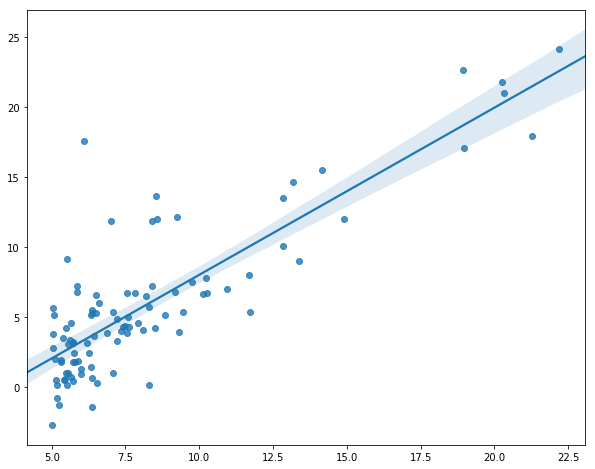

In [4]:
# plot the data here
sns.regplot(x, y, 'rx', label='Population VS Profit data')

The tutorial shows an example of actually building a regression model where data is held back from the training
so that we can evaluate the accuracy of our predictive model.  We will try that next.  First of all, lets 
fit a linear regression model to all of the data, and compare the fitted parameters with what we obtained when
we implemented the linear regression by hand on our own in assignment 02.

In [5]:
# fit the linear regression model to all of the data
#X = sm.add_constant(X)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#print(x_train.shape)
#print(y_train.shape)
X = x[:, np.newaxis]
X.shape
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# retrieve the intercept and slope
display(model.intercept_)
display(model.coef_[0])

-3.89578087831185

1.1930336441895935

You should compare your intercept and slope you determine here using Scikit Learn with the one we obtained in
assignment 02.  The slope and intercept should be exactly the same as the ones obtained using the normal
equation at the end of assignment 02 (or the same as your by hand implementaiton if you iterate your gradient
descent a sufficient number of times).

The slope and intercept we had from assignment 02 were:

slope: -3.89578088

intercept: 1.19303364

As shown in the tutorial, use the predict() method of your Scikit Learn regression model to predict
each value of our x data features

In [7]:
# using predict() from scikit-learn find the predicted or hypothesized profit for each of the model populations
xfit = np.linspace(-1, 15)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)


Now we can plot the determined linear fit line given by Scikit Learn to our data

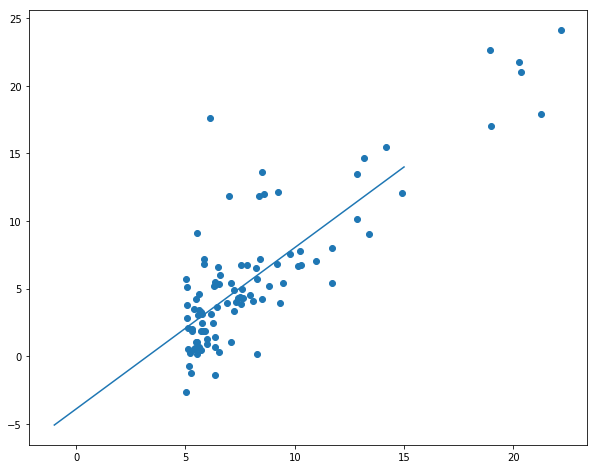

In [8]:
# plot the fitted line using the predict() method from the LinearRegression object
plt.scatter(x, y)
plt.plot(xfit, yfit)

## statsmodels Linear Regression

In contrast to the scikit-learn library, the python statsmodel library is primarily geared towards doing statistical
analysis of data, similar to a stats package like using SPSS or R.  You can perform a linear regression on a data
set using the statsmodel package, and get much more information about the goodness of the fit from the
constructed model.

In the next cell, create a model using statsmodels OLS (ordinary least squared fit) function, fit the model, and use the summary() function
to get infroamtion about the fit.

In [9]:
# load the data from our assignment 02 linear regression problem again if needed
data = pd.read_csv('data/assg-02-data.csv')
x = data['population']
y = data['profit']
m = y.size
print(m)

97


In [10]:
# unlike for sklearn library, we actually have to add the dummy feature by hand to 
# represent the intercept feature, it is not assumed automatically by OLS
# use the add_constant() method to add a column to represent our intercept coefficient in the model.
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

/Users/pavanshru/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
# use the statsmodels summary method to get a summary of the statistical fit of your linear regression.
# Check the fitted parameters to the results from scikit-learn and from your assignment 02.
model2 = model.summary()
print(model2)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.02e-26
Time:                        15:11:19   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.0

In the summary you should note that you get the same coefficients as we have determined using all of our
other methods for the linear regression fit to this data.  The $R^2$ measure of the fit is also the same
as what we got for fitting all of the data for the sklearn model.  

The rest of the summary information are some statistical information about how well the model fits
the data.  The data in the table under the [0.025 0.975] columns give a 95% confidence interval for
the coefficients.  For example from the measure of the noise and fit we are 95% confident that the true
coefficient for the x1 parameter is somewhere between 1.035 and 1.351.  The P>|t| measure is also
important here.  This is a P-value that measure how surprised we would be to see this fit if there was
actually no linear relationship between the independent variable and the dependent variable.  Both of these
measures are basically 0, which means we would be very surprised to see this fit if there was no linear
relationship between the features and the dependent variable.  When the P value here is large (usually
a cutoff of 0.05 is used), then that means we are not so surprised to see the result if there was no
relationship.


# Logistic Regression for a Binary Classifier

## scikit-learn LogisticRegression model

Load and plot the exam score data with binary class labels of accepted/not accepted.  Here we
use the features of the Seaborn plotting library again to display markers based on each
data point in a scatter plot.  Recall that this data set has 2 exam scores (exam1 and exam2),
for a number of students, and a binary category for each student of whether they were admitted
or not to the university.


[Logistic Regression using Python (scikit-learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

[Logistic Regression in Python Using statsmodels](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html)

In [12]:
# load the data from our assignment 03 logistic classification problem here
data = pd.read_csv('data/assg-03-data.csv', names=['exam1', 'exam2', 'admitted'])
x = data[['exam1', 'exam2']].values
y = data.admitted.values
print(x.shape)
print(y.shape)
m = y.size

(100, 2)
(100,)


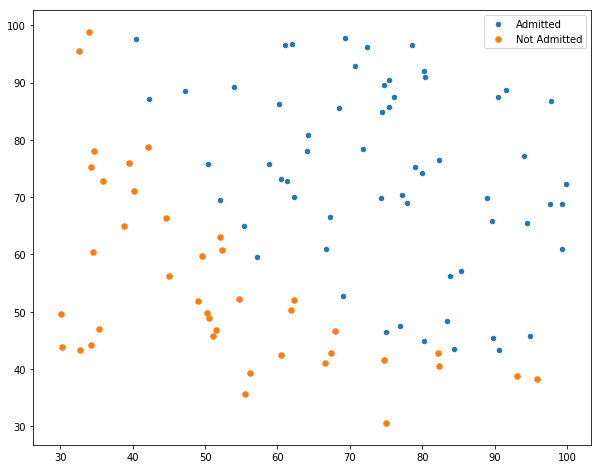

In [13]:
# replot the exam1/exam2 data indicating the binary categories using marker type again here for reference

admitted = data.loc[y==1]
not_admitted = data.loc[y==0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=30, label='Not Admitted')
plt.legend()
plt.show()

Now we will use Scikit Learn to fit a model again, but of course we will fit a binary logistic regression classifier
to our data to find the best decision boundary between the two classes.

In the next cell, create the Scikit Learn logistic regression model and fit it to our data.

In [14]:
# Create the scikit-learn LogisticRegression instance here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=19)
model3 = LogisticRegression(solver='lbfgs')
# and fit your model to the college acceptance using exam scores data here
model3.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In assignment 03, we used an optimization method to optimize our cost and gradient functions and find the
best parameters.  For a binary classifier with 2 features like this, there are 3 parameters in the model,
the intercept, and the parameters for exam1 and exam2 that were fit to define the decision boundary.

In assignment 03, our by hand solution using a scipy optimizer found the following parameters, where the first
parameter is the intercept, and the second and third are the theta parameters fit for the exam1 and exam2
feature respectively:

[-25.16133586   0.20623176   0.2014716 ]

In the model returned by Scikit Learn, the intercept_ should correspond and match the intercept value,
and the coef_ should match the exam1 and exam2 coefficient parameters.

In [15]:
# display the intercept and the model coefficients for the exam1 and exam2 feature here
print(model3.coef_[0])
print(model3.intercept_)

[0.20972914 0.20324562]
[-25.72600518]


The parameters in this case might not exactly match because of the differences in the optimization methods, but
they will be close and essentially form almost the same decision boundary.

As we did in assignment 03, for a 2 parameter set of data we can use the intercept and coefficients to
visualize the decision boundary specified by the fitted logistic regression model.

[30.05882245 99.8278578 ]


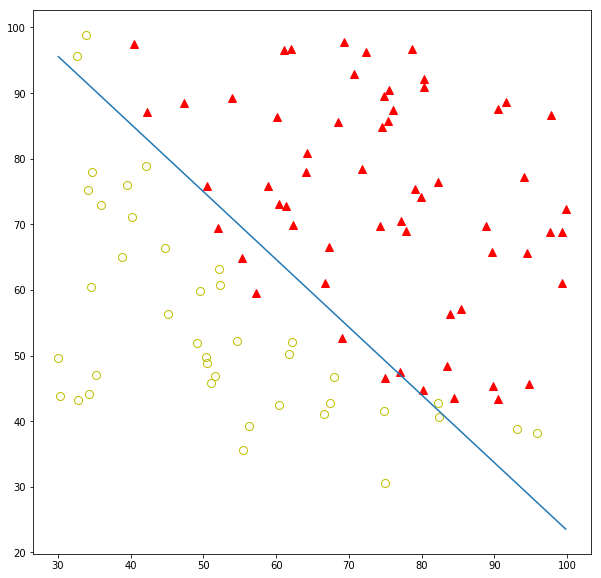

In [16]:
# plot the decision boundary line found by the scikit-learn logistic classification
# plot the visualization of the exam scores here
pos_idx = np.where( y == 1 )
neg_idx = np.where(y == 0)

# plot the example figure
plt.figure(figsize=(10,10))

# plot the points in our two categories, y=0 and y=1, using markers to indicated
# the category or output
plt.plot(x[pos_idx,0], x[pos_idx,1], 'r^', markersize=8, markeredgewidth=1)
plt.plot(x[neg_idx,0], x[neg_idx,1], 'yo', markersize=8, fillstyle='none', markeredgewidth=1) 
 

#x = np.array([X[:,0].max(),X[:,1].max()])

min = x_train.min()
max = x_train.max()
x = np.array([min,max])
y = -((model3.intercept_ + model3.coef_[0][0]*x))/ model3.coef_[0][1]
plt.plot(x, y)
print(x)

## statsmodels Logistic Regression

Likewise use the statsmodels library to redo the Logistic Regression classification of the adming/not admit
data set once again.  In the following cells, load the data, add in the constant column needed by statsmodels
to fit the model using the intercept parameter, then create an instance and fit the model, and show a summary
of your logistic regression results.

In [17]:
# get fresh reload of the data if needed here to ensure you have correct starting values of the assignment 03
# classification data
# load the data from our assignment 03 logistic classification problem here
data = pd.read_csv('data/assg-03-data.csv', names=['exam1', 'exam2', 'admitted'])
x = data[['exam1', 'exam2']].values
y = data.admitted.values
print(x.shape)
print(y.shape)
m = y.size

(100, 2)
(100,)


In [18]:
# unlike for sklearn library, we actually ahve to add the dummy feature by hand to 
# represent the intercept feature, it is not assumed automatically by OLS
# make sure you add the intercept feature column here before fitting the model.
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:                  0.6976
Time:                        15:11:20   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
                                        LLR p-value:                 4.067e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.1613      5.799     -4.339      0.000     -36.526     -13.796
x1             0.2062      0.

In [19]:
# create an instance of the statsmodel Logit model (you don't need MNLogit here since this is
# a binary classification task).
train_cols = data.columns[0:2]
print(train_cols)
logit = sm.Logit(y,x)


Index(['exam1', 'exam2'], dtype='object')


In [20]:
# fit your model to get a statsmodel model fit wrapper
regression_model = logit.fit(solver='lbfgs')

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9


In [21]:
# display a summary of the fit of your classifier.  You might want to compare your intercept and
# fitted coefficients again, though because of differences in the optimizer/solvers used your coefficients
# may not be exact matches as before with the linear regression fit.
print(regression_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:                  0.6976
Time:                        15:11:20   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
                                        LLR p-value:                 4.067e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.1613      5.799     -4.339      0.000     -36.526     -13.796
x1             0.2062      0.048      4.296      0.000       0.112       0.300
x2             0.2015      0.049      4.143      0.0